In [1]:
import datetime
start_time = datetime.datetime.now()
start_time

datetime.datetime(2022, 4, 24, 10, 5, 16, 484376)

In [2]:
# Also runs installation of dependencies
from lib.util import *

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import dtale
from sklearn.preprocessing import StandardScaler

In [4]:
df = read_csv('../dataset/TEDS-D-2019-DS0001-bndl-data-tsv_V1.zip')
df.shape

(1722503, 76)

In [5]:
df.head()

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2019,20191553576,2,-9,4,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1
1,2019,20191465214,2,-9,3,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
2,2019,20191443889,2,-9,2,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
3,2019,20191409377,2,-9,3,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,3
4,2019,20191479567,2,-9,3,3,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1


In [6]:
df.columns

Index(['DISYR', 'CASEID', 'STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'SERVICES',
       'DETCRIM', 'LOS', 'PSOURCE', 'NOPRIOR', 'ARRESTS', 'EMPLOY', 'METHUSE',
       'PSYPROB', 'PREG', 'GENDER', 'VET', 'LIVARAG', 'DAYWAIT', 'SERVICES_D',
       'REASON', 'EMPLOY_D', 'LIVARAG_D', 'ARRESTS_D', 'DSMCRIT', 'AGE',
       'RACE', 'ETHNIC', 'DETNLF', 'DETNLF_D', 'PRIMINC', 'SUB1', 'SUB2',
       'SUB3', 'SUB1_D', 'SUB2_D', 'SUB3_D', 'ROUTE1', 'ROUTE2', 'ROUTE3',
       'FREQ1', 'FREQ2', 'FREQ3', 'FREQ1_D', 'FREQ2_D', 'FREQ3_D', 'FRSTUSE1',
       'FRSTUSE2', 'FRSTUSE3', 'HLTHINS', 'PRIMPAY', 'FREQ_ATND_SELF_HELP',
       'FREQ_ATND_SELF_HELP_D', 'ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG',
       'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG',
       'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG',
       'OTCFLG', 'OTHERFLG', 'DIVISION', 'REGION', 'IDU', 'ALCDRUG'],
      dtype='object')

In [7]:
df.nunique(axis=0)

DISYR             1
CASEID      1722503
STFIPS           49
CBSA2010        279
EDUC              6
             ...   
OTHERFLG          2
DIVISION         10
REGION            5
IDU               3
ALCDRUG           4
Length: 76, dtype: int64

In [8]:
#df.describe()

In [9]:
# state_list = df['STFIPS'].unique().tolist()
# state_list

In [10]:
state_dict = {1:'Alabama',2:'Alaska',4:'Arizona', 5:'Arkansas',6:'California',8:'Colorado',9:'Connecticut',
              10:'Delaware', 11:'District of Columbia', 12:'Florida', 13:'Georgia', 15:'Hawaii', 16:'Idaho', 
              17:'Illinois', 18:'Indiana', 19:'Iowa', 20:'Kansas', 21:'Kentucky', 22:'Louisiana', 23:'Maine', 
              24:'Maryland', 25:'Massachusetts', 26:'Michigan', 27:'Minnesota', 28:'Mississippi', 29:'Missouri',
              30:'Montana', 31:'Nebraska', 32:'Nevada', 33:'New Hampshire', 34:'New Jersey', 35:'New Mexico', 
              36:'New York', 37:'North Carolina', 38:'North Dakota', 39:'Ohio', 40:'Oklahoma', 42:'Pennsylvania',
              44:'Rhode Island', 45:'South Carolina', 46:'South Dakota', 47:'Tennessee', 48:'Texas', 49:'Utah',
              50:'Vermont', 51:'Virginia', 55:'Wisconsin', 56:'Wyoming', 72:'Puerto Rico'}

In [11]:
reason_dict = {1:'1 - Treatment Completed', 2:'2 - Dropped out of treatment', 3:'3 - Terminated by facility', 4:'4 - Transferred to another treatment/facility',5:'5 - Incarcerated',6:'6 - Death',7:'7 - Other'}


In [12]:
#df = df.replace(-9, np.nan) #Replace coded missing values

In [13]:
# pd.options.display.max_rows = 100
# print(df.dtypes) #Confirm that all data is numerical

## PCA Testing (Select Features, 2 components)

In [14]:
features = ['LOS','SERVICES','PSOURCE','SUB1','ROUTE1','FREQ1','DSMCRIT','PSYPROB','HLTHINS']

x = df.loc[:, features].values

y = df.loc[:, ['REASON']].values

x = StandardScaler().fit_transform(x)

In [15]:
from sklearn.decomposition import PCA

pca = (PCA(n_components=2))

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2'])

finalDf = pd.concat([principalDf, df[['REASON']]], axis=1)


(-3.0, 3.0)

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


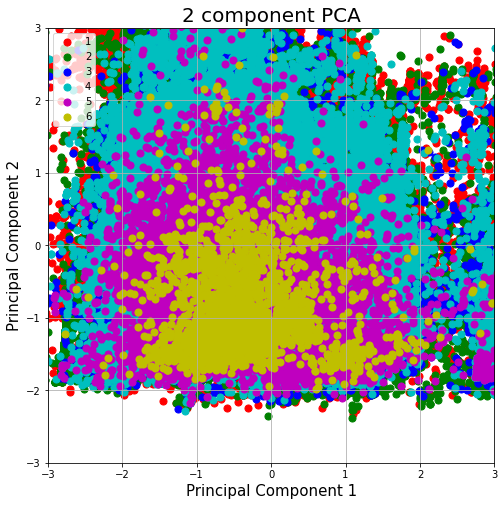

In [16]:
%matplotlib inline

fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,2,3,4,5,6]
#targets = ['Treatment Completed','Dropout','Terminated by Facility','Transfer','Incarcerated','Death','Other']
colors = ['r', 'g', 'b','c','m','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['REASON'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

ax.set_xlim([-3,3])
ax.set_ylim([-3,3])

## PCA Testing (All Columns, 2 components)

In [17]:
#All Columns

x = df.loc[:, df.columns != 'REASON'].values

y = df.loc[:, ['REASON']].values

x = StandardScaler().fit_transform(x)

In [18]:
pca = (PCA(n_components=2))

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
                          , columns = ['PC1','PC2'])

finalDf = pd.concat([principalDf, df[['REASON']]], axis=1)

(-5.0, 5.0)

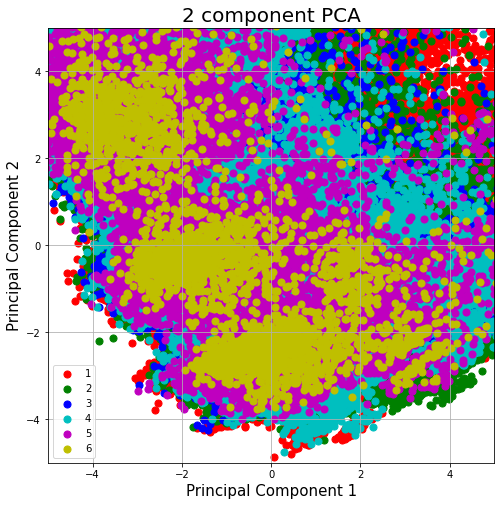

In [19]:
%matplotlib inline

fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,2,3,4,5,6]
#targets = ['Treatment Completed','Dropout','Terminated by Facility','Transfer','Incarcerated','Death','Other']
colors = ['r', 'g', 'b','c','m','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['REASON'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

### PCA Variance and Clustering?

([<matplotlib.axis.XTick at 0x1917b57a670>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

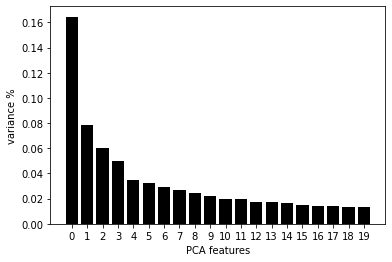

In [20]:
from sklearn.cluster import KMeans

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(x)

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

Looks like a slight dropoff after four components.

Text(0, 0.5, 'PCA 2')

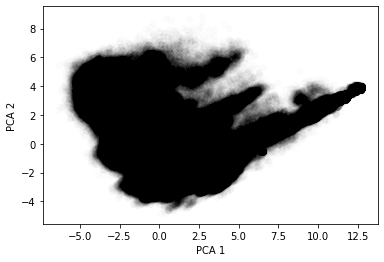

In [21]:
PCA_components_df = pd.DataFrame(principalComponents)

plt.scatter(PCA_components_df[0], PCA_components_df[1], alpha=.01, color='black') #Alpha reduced to look for clustering
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Roughly three clusters? Hard to reduce alpha much further for clarity.

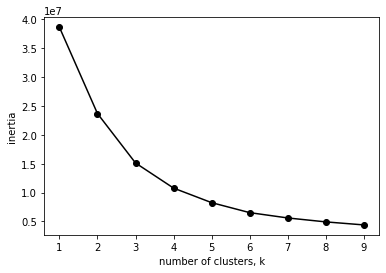

In [22]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components_df.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Slight elbow after 3 clusters.

## Completion Rates by...

### State

In [23]:
df2 = df.copy()
state_completion_df = df2.groupby(['STFIPS','REASON']).size().reset_index()

In [24]:
state_completion_df = state_completion_df.rename(columns={0:'COUNT'})


In [25]:
state_completion_df['PERC'] = 100 * state_completion_df['COUNT'] / state_completion_df.groupby(['STFIPS'])['COUNT'].transform('sum')

state_completion_df = state_completion_df.replace({'STFIPS': state_dict})
state_completion_df = state_completion_df.replace({'REASON': reason_dict})

In [26]:
%matplotlib inline

import altair as alt

bar = alt.Chart(state_completion_df).mark_bar().transform_calculate(
        filtered='datum.REASON == "1 - Treatment Completed" ? datum.PERC : 0'
        ).encode(
            x=alt.X('PERC:Q', scale=alt.Scale(domain=(0,100)), axis=alt.Axis(title='Percentage of Cases')),
            y=alt.Y('STFIPS:N', sort=alt.SortField('filtered', order = 'descending'), axis=alt.Axis(title='State')),
            color='REASON:N',
            order=alt.Order('REASON',sort='ascending'))

bar

alt.Chart(...)

### Choropleth Testing

In [27]:
state_reason1_df = state_completion_df[state_completion_df['REASON']=='1 - Treatment Completed']

In [28]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [29]:
state_abbv_df = state_reason1_df.replace({'STFIPS':us_state_to_abbrev})

#state_abbv_df

In [30]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_abbv_df['STFIPS'],
    z=state_abbv_df['PERC'],
    locationmode = 'USA-states',
    colorscale = 'Blues',
    colorbar_title = 'Completion Percentage'))

fig.update_layout(
    title_text = '2019 Substance Treatment Completion Rates by State',
    geo_scope='usa')

fig.show()

### Region/Census Division

In [31]:
df2 = df.copy()
completion_df = df2.groupby(['DIVISION','REASON']).size().reset_index()
completion_df = completion_df.rename(columns={0:'COUNT'})
completion_df['PERC'] = 100 * completion_df['COUNT'] / completion_df.groupby(['DIVISION'])['COUNT'].transform('sum')

bar = alt.Chart(completion_df).mark_bar().encode(
    x='DIVISION:N',
    y='PERC',
    color='REASON:N',
#    order=alt.Order('PERC', sort='ascending'
#                   )
)

bar

alt.Chart(...)

### Treatment Type @ Admission

In [32]:
df3 = df.copy()
completion_df = df3.groupby(['SERVICES','REASON']).size().reset_index()
completion_df = completion_df.rename(columns={0:'COUNT'})
completion_df['PERC'] = 100 * completion_df['COUNT'] / completion_df.groupby(['SERVICES'])['COUNT'].transform('sum')

bar = alt.Chart(completion_df).mark_bar().encode(
    x='SERVICES:N',
    y='PERC',
    color='REASON:N',
#    order=alt.Order('PERC', sort='ascending'
#                   )
)

bar

alt.Chart(...)

### Treatment Type @ Discharge

In [33]:
df4 = df.copy()
completion_df = df4.groupby(['SERVICES_D','REASON']).size().reset_index()
completion_df = completion_df.rename(columns={0:'COUNT'})
completion_df['PERC'] = 100 * completion_df['COUNT'] / completion_df.groupby(['SERVICES_D'])['COUNT'].transform('sum')

bar = alt.Chart(completion_df).mark_bar().encode(
    x='SERVICES_D:N',
    y='PERC',
    color='REASON:N',
#    order=alt.Order('PERC', sort='ascending'
#                   )
)

bar

alt.Chart(...)

In [34]:
end_time = datetime.datetime.now()
end_time

datetime.datetime(2022, 4, 24, 10, 9, 56, 558321)

In [35]:
# How long it took to run our entire notebook
end_time - start_time

datetime.timedelta(seconds=280, microseconds=73945)